Eigenvalue decomposition

In [1]:
#Problems with regard to covariance matrix for portfolio optimization
#Negative eigenvalue 
import yfinance as yf
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set()


In [3]:
#ticker list: XLK, XLF, XLE, XLU, XLP, XLY, XLI, XLB, XLV, XLC
tickers = ['XLK', 'XLF', 'XLE', 'XLU', 'XLP', 'XLY', 'XLI', 'XLB', 'XLV', 'XLC']
etf = yf.download(tickers, start='2010-01-01', end='2020-12-31')
etf = etf['Adj Close']
etf = etf.dropna()

[*********************100%%**********************]  10 of 10 completed


In [5]:
#Monthly data
etf = etf.resample('M').last()
#Last 라는 것은 각 달의 마지막 날을 의미한다.
#Monthly return
etf = etf.pct_change().dropna()
#Covariance matrix
cov = etf.cov() *12

<Axes: >

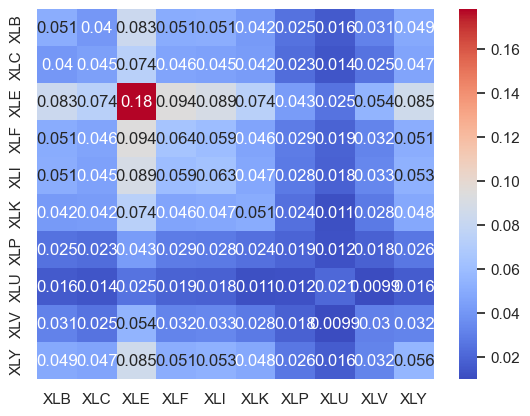

In [8]:
#Eigenvalue decomposition
w, v = np.linalg.eig(cov)

#Heatmap of covariance matrix
sns.heatmap(cov, annot=True, cmap='coolwarm')


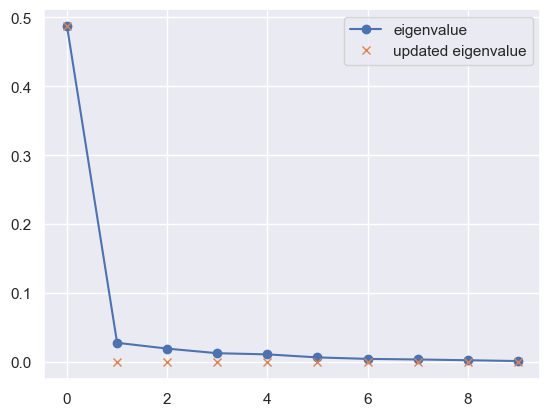

C:\Users\Daniel\AppData\Local\Temp\ipykernel_21068\665869708.py:17: RuntimeWarning: divide by zero encountered in divide
  inv_mat = v @ np.diag(np.where(noise_free_w !=0, 1/noise_free_w, 0)) @ v.T


In [12]:
#Covvairance matrix inverse calcuation function
import matplotlib.pyplot as plt

def cov_inv(cov, eps=0.05, is_plot= True):
    w, v = np.linalg.eig(cov)
    if np.where(w>=0, True, False).sum() != len(w):
        w = np.where(w<0, 0, w)
    weighted_w = w / np.sum(w)
    noise_free_w = np.where(weighted_w >= eps, w, 0)
    if is_plot:
        plt.plot(np.sort(w)[::-1], 'o-', label='eigenvalue')
        plt.plot(np.sort(noise_free_w)[::-1], 'x', label='updated eigenvalue')
        plt.legend()
        plt.show()

    #calculate inverse covariance mat
    inv_mat = v @ np.diag(np.where(noise_free_w !=0, 1/noise_free_w, 0)) @ v.T
    new_cov_mat = v @ np.diag(noise_free_w) @ v.T
    
    return inv_mat, new_cov_mat

#Inverse covariance matrix
inv_cov, new_cov = cov_inv(cov, eps=0.05, is_plot=True)


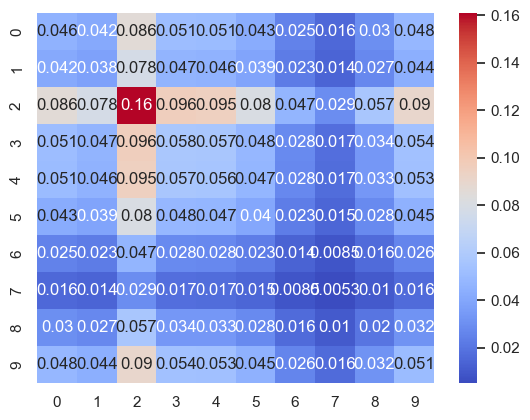

In [14]:
#heatmap of new covariance matrix
sns.heatmap(new_cov, annot=True, cmap='coolwarm')
plt.show()